# Apple Stock Analysis Project

## Overview
A Python script that fetches, analyzes, and visualizes Apple (AAPL) stock data with moving averages.

In [1]:
pip install yfinance matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


| Library      | Purpose            | Why Needed                          ||
|--------------|--------------------|-------------------------------------||
| `yfinance`   | Fetch stock data   | Gets AAPL prices from Yahoo Finance ||
| `pandas`     | Data manipulation  | Handles the DataFrame structure     ||
| `matplotlib` | Visualization      | Creates price charts                ||
| `datetime`   | Date handling      | Calculates 1-year time range        ||

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [20]:
def fetch_apple_data():
    end_date = datetime.now()
    start_date = end_date - timedelta(365)
    aapl = yf.download("AAPL", start = start_date, end = end_date)
    return aapl

Fetches AAPL stock data for the last 365 days.
    
    Returns:
        pd.DataFrame: Contains OHLC (Open/High/Low/Close) prices

Key Points:

- Uses yfinance's download() method

- Automatically calculates date range (365 days from today)

- Returns raw DataFrame with stock prices

In [21]:
aapl_data = fetch_apple_data()

C:\Users\hp\AppData\Local\Temp\ipykernel_39840\2489741765.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


In [22]:
print(aapl_data)

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-07-19  223.265854  225.744269  222.240650  223.773490  49151500
2024-07-22  222.917496  226.719706  222.051535  225.953286  48201800
2024-07-23  223.962585  225.883609  221.643430  223.325565  39960300
2024-07-24  217.522705  223.753575  216.119280  222.957296  61777600
2024-07-25  216.477615  219.821976  213.620965  217.910900  51391200
...                ...         ...         ...         ...       ...
2025-07-14  208.619995  210.910004  207.539993  209.929993  38840100
2025-07-15  209.110001  211.889999  208.919998  209.220001  42296300
2025-07-16  210.160004  212.399994  208.639999  210.300003  47490500
2025-07-17  210.020004  211.800003  209.589996  210.570007  48068100
2025-07-18  211.179993  211.789993  209.699997  210.869995  48939500

[250 rows x 5 columns]


In [23]:
def calculate_moving_averages(data):
    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    return data

Adds moving average columns to the DataFrame.
    
    Args:
        data (pd.DataFrame): Must contain 'Close' column
        
    Returns:
        pd.DataFrame: Original data + MA_20 and MA_50 columns

About .rolling():

- Creates a sliding window of prices

- window=20 = 20 trading days (~1 month)

- Calculates mean for each window

- First 19 days will show NaN (not enough data)

In [24]:
moving_averages = calculate_moving_averages(aapl_data)
print(moving_averages)

Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-07-19  223.265854  225.744269  222.240650  223.773490  49151500   
2024-07-22  222.917496  226.719706  222.051535  225.953286  48201800   
2024-07-23  223.962585  225.883609  221.643430  223.325565  39960300   
2024-07-24  217.522705  223.753575  216.119280  222.957296  61777600   
2024-07-25  216.477615  219.821976  213.620965  217.910900  51391200   
...                ...         ...         ...         ...       ...   
2025-07-14  208.619995  210.910004  207.539993  209.929993  38840100   
2025-07-15  209.110001  211.889999  208.919998  209.220001  42296300   
2025-07-16  210.160004  212.399994  208.639999  210.300003  47490500   
2025-07-17  210.020004  211.800003  209.589996  210.570007  48068100   
2025-07-18  211.179993  211.789993  209.699997  210.869995  4893

In [25]:
def plot_apple_data(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'], label = 'Close Price', color = 'blue', alpha =  0.5)
    plt.plot(data['MA_20'], label = 'MA 20', color = 'orange', linestyle = '--')
    plt.plot(data['MA_50'], label = 'MA 50', color = 'purple', linestyle = '--')
    plt.title('Apple Stock Analysis')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.savefig('Apple_Stock_Analysis.png')
    plt.show()

Chart Elements:

- Blue line: Daily closing prices

- Orange line: 20-day moving average

- Purple line: 50-day moving average

- Saved as PNG for sharing

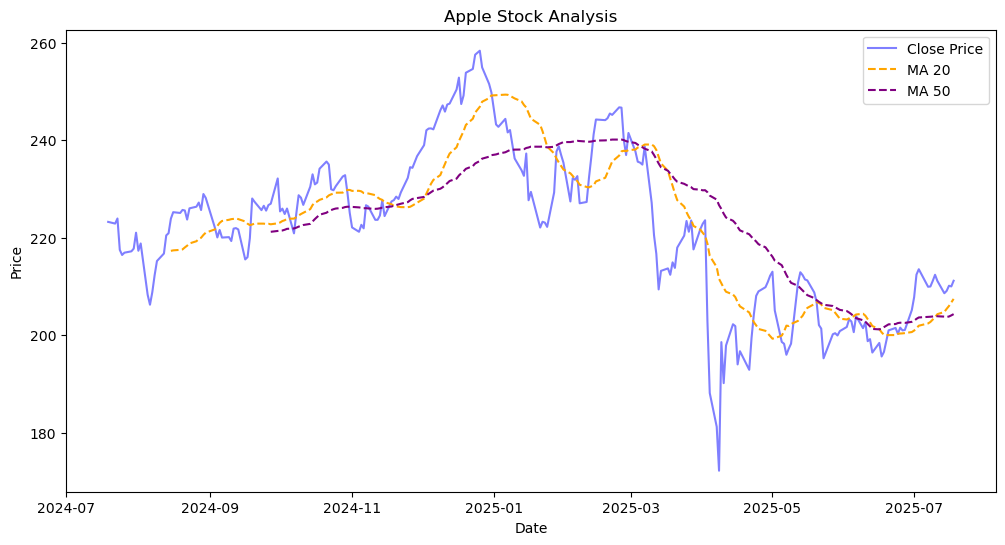

In [26]:
%matplotlib inline
plot_apple_data(moving_averages) 

In [27]:
def save_to_csv(data):
    data.to_csv('apple_stock_data.csv')
    print("Data saved as 'apple_stock_data.csv'. ")

Fetching AAPL stock data for the last year...


C:\Users\hp\AppData\Local\Temp\ipykernel_39840\2489741765.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


Calculating moving averages...
Plotting trends...


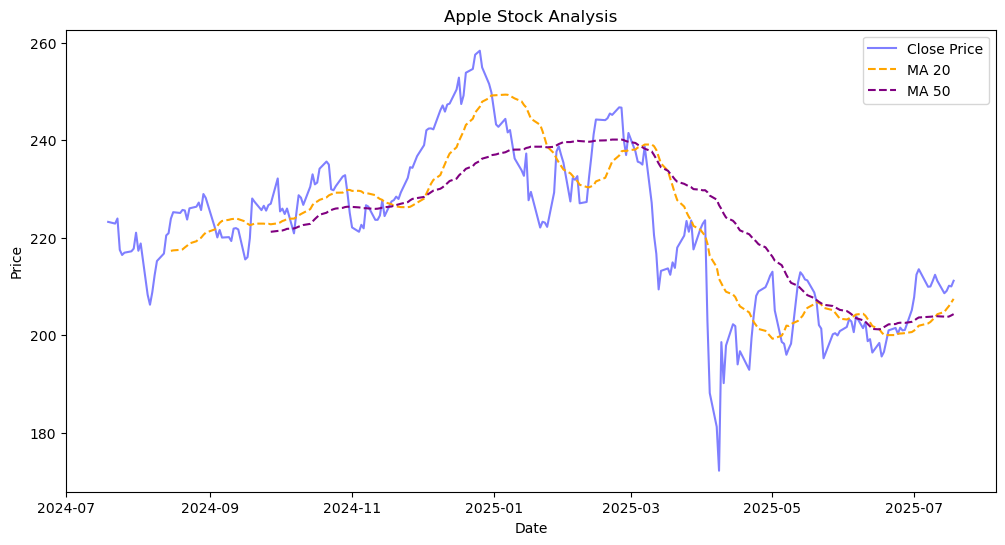

Data saved as 'apple_stock_data.csv'. 
Analysis complete! Check 'aapl_stock_analysis.png' for the chart.


In [31]:
# Main Execution block

if __name__ == "__main__":
    print("Fetching AAPL stock data for the last year...")
    aapl_data = fetch_apple_data()                    # Step 1: Fetch data
    
    print("Calculating moving averages...")
    aapl_data = calculate_moving_averages(aapl_data)  # Step 2: Add MAs
    
    print("Plotting trends...")
    plot_apple_data(aapl_data)                       # Step 3: Plot
    
    save_to_csv(aapl_data)                          # Step 4: Save data
    print("Analysis complete! Check 'aapl_stock_analysis.png' for the chart.")

Why if __name__ == "__main__":?

Makes the script both:

- Runnable (executes when you do python script.py)

- Importable (others can use your functions without running the analysis)

- Special Python feature (don't change the underscores)

## How Everything Connects


### 1. Function Chain:

fetch_apple_data() → returns DataFrame<br>
    ↓<br>
calculate_moving_averages() → adds MA columns<br>
    ↓<br>
plot_apple_data() → generates chart

### 2.Variable Flow:

|Variable/Operation          |Description      |
|:--------------------------:|:---------------:|
|aapl_data = fetch...()      | Create DataFrame|
|aapl_data = calculate...()  | Modify DataFrame|
|plot...(aapl_data)          | Use DataFrame   |

### 3.Key Connections:

- fetch_apple_data() returns data → becomes aapl_data

- aapl_data passed to next function → becomes data parameter

- Each function enhances the data progressively

In [35]:
import os
custom_path = r"C:\Users\hp\OneDrive\Documents\PranPY"